In [1]:
from sklearn.ensemble import RandomForestRegressor
from pandas import Timestamp
from functools import partial
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.helpers import get_data, clean_data, split_data, train_model, save_model, predict
%matplotlib inline

In [2]:
train_set = get_data('../data/raw/train_set.csv')
train_set.head()

,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5
0,2019-12-02 08:00:00+03:00,USEmbassy,74.088667,83.767111,0.000000,0.000000,0.962917,21.475000,0.299255,32.592686,1199,4374,21,14,6834,130,95.0
1,2020-03-17 02:00:00+03:00,USEmbassy,88.350233,96.003023,86.993256,107.929767,0.967667,19.233333,0.299255,32.592686,1199,4374,21,14,6834,130,139.0
2,2019-10-13 05:00:00+03:00,USEmbassy,47.540513,58.672308,48.684103,60.505128,0.999250,18.916667,0.299255,32.592686,1199,4374,21,14,6834,130,46.0
3,2020-04-04 11:00:00+03:00,USEmbassy,24.567619,27.151429,23.406667,27.316429,0.783500,25.475000,0.299255,32.592686,1199,4374,21,14,6834,130,33.0
4,2020-03-22 20:00:00+03:00,USEmbassy,46.644857,57.555143,46.195143,60.075714,0.721833,22.916667,0.299255,32.592686,1199,4374,21,14,6834,130,60.0


In [3]:
train_set = clean_data(train_set)
train_set.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_270m,population,ref_pm2_5,hour_of_day
0,74.088667,83.767111,74.088667,83.767111,0.962917,21.475000,0.299255,32.592686,1199,4374,14,6834,95.0,8
1,88.350233,96.003023,86.993256,107.929767,0.967667,19.233333,0.299255,32.592686,1199,4374,14,6834,139.0,2
2,47.540513,58.672308,48.684103,60.505128,0.999250,18.916667,0.299255,32.592686,1199,4374,14,6834,46.0,5
3,24.567619,27.151429,23.406667,27.316429,0.783500,25.475000,0.299255,32.592686,1199,4374,14,6834,33.0,11
4,46.644857,57.555143,46.195143,60.075714,0.721833,22.916667,0.299255,32.592686,1199,4374,14,6834,60.0,20


In [4]:
X = train_set.drop(columns = ['ref_pm2_5'], axis=1)
y = train_set['ref_pm2_5']

In [5]:
Xtrain, Xtest, ytrain, ytest = split_data(X, y)

In [6]:
rfr = RandomForestRegressor()

In [7]:
train_model(rfr, Xtrain, ytrain)

In [8]:
save_model(rfr, '../models/rfr.joblib')

In [9]:
rmse, ypred = predict(rfr, Xtest, ytest)
rmse

13.48

In [10]:
rfr2 = RandomForestRegressor( #From GridSearchCV
    max_depth=20,
    max_features='auto',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    oob_score=False)

In [11]:
train_model(rfr2, Xtrain, ytrain)

In [12]:
save_model(rfr2, '../models/rfr_grid_search.joblib')

In [13]:
rmse, ypred = predict(rfr2, Xtest, ytest)
rmse

13.16

#### Testing on held-out data

In [14]:
Xactual = get_data('../data/raw/test_set.csv')
Xactual.head()

,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road
0,2020-03-20 12:00:00+03:00,USEmbassy,9.903636,10.259545,8.852727,10.097727,0.748000,26.491667,0.299255,32.592686,1199,4374,21,14,6834,130
1,2019-10-12 06:00:00+03:00,USEmbassy,38.428333,45.940714,40.087143,48.159762,0.995000,18.225000,0.299255,32.592686,1199,4374,21,14,6834,130
2,2019-12-13 17:00:00+03:00,USEmbassy,13.278000,14.967333,0.000000,0.000000,0.687500,24.891667,0.299255,32.592686,1199,4374,21,14,6834,130
3,2019-11-13 09:00:00+03:00,USEmbassy,36.304000,40.366750,89.182500,93.572500,0.868417,22.616667,0.299255,32.592686,1199,4374,21,14,6834,130
4,2019-08-07 19:00:00+03:00,USEmbassy,56.686410,67.412308,55.048974,66.089487,0.782083,23.350000,0.299255,32.592686,1199,4374,21,14,6834,130


In [15]:
Xactual = clean_data(Xactual)
Xactual.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_270m,population,hour_of_day
0,9.903636,10.259545,8.852727,10.097727,0.748000,26.491667,0.299255,32.592686,1199,4374,14,6834,12
1,38.428333,45.940714,40.087143,48.159762,0.995000,18.225000,0.299255,32.592686,1199,4374,14,6834,6
2,13.278000,14.967333,13.278000,14.967333,0.687500,24.891667,0.299255,32.592686,1199,4374,14,6834,17
3,36.304000,40.366750,89.182500,93.572500,0.868417,22.616667,0.299255,32.592686,1199,4374,14,6834,9
4,56.686410,67.412308,55.048974,66.089487,0.782083,23.350000,0.299255,32.592686,1199,4374,14,6834,19


In [16]:
yactual = get_data('../data/raw/test_solution.csv')
yactual.head()

,ref_pm2_5
0,30.0
1,44.0
2,27.0
3,48.0
4,57.0


In [17]:
rmse_heldout1, ypred_heldout1 = predict(rfr, Xactual, yactual)
rmse_heldout1

13.18

In [18]:
rmse_heldout2, ypred_heldout2 = predict(rfr2, Xactual, yactual)
rmse_heldout2

13.18

Text(0, 0.5, 'Predictions ')

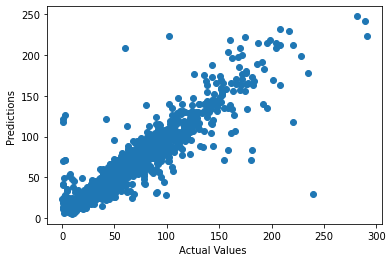

In [19]:
g=plt.scatter(yactual, ypred_heldout2)
g.axes.set_xlabel('Actual Values ')
g.axes.set_ylabel('Predictions ')

In [20]:
ytest.shape, ypred.shape, ypred2.shape

NameError: name 'ypred2' is not defined

In [ ]:
y_df = Xtest[['pm2_5', 'pm10', 'altitude', 'hour_of_day']]
y_df.head()

In [ ]:
y_df['ref_pm2_5'] = ytest
y_df.head()

In [ ]:
y_df['ypred'] = ypred
y_df.head()

In [ ]:
#y_df['ypred2'] = ypred4
#y_df.head()

In [ ]:
y_df['diff_ref'] = abs(y_df['ref_pm2_5'] - y_df['ypred'])
y_df['diff2_lc'] = abs(y_df['ref_pm2_5'] - y_df['pm2_5'])
y_df.head()

In [ ]:
y_df.to_csv(r'actual_vs_pred.csv', index=False)

In [ ]:
diff_df = y_df[(y_df['diff_ref']>=50)]
diff_df.shape

In [ ]:
diff_df

In [ ]:
diff_df['altitude'].value_counts()